In [1]:
import cv2
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

print("Press c to capture background")
video = cv2.VideoCapture(0)
while(video.isOpened()):
    frame = video.read()[1]
    cv2.imshow("Capturing",frame)
    key = cv2.waitKey(1)
    if key == ord('c'):
        captured_frame = video.read()[1]
        print("Background captured")
        cv2.imwrite("/Users/tobiasschulz/Documents/GitHub/mask-detector/face_detector_ssd/dark_img_opti/hell_img.jpg",captured_frame)
video.release()
cv2.destroyAllWindows 
cv2.waitKey(1)

Press c to capture background
Background captured


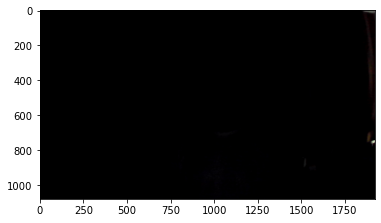

In [14]:
img = cv2.imread("/Users/tobiasschulz/Documents/GitHub/mask-detector/face_detector_ssd/dark_img_opti/dark_img.jpg")
plt.imshow(img);

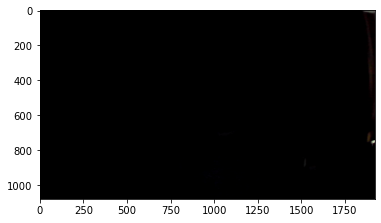

In [71]:
img_clip = img.clip(3,255)
img_add = img_clip + 253
plt.imshow(img_add);

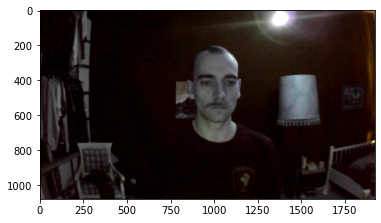

In [2]:
img2 = cv2.imread("/Users/tobiasschulz/Documents/GitHub/mask-detector/face_detector_ssd/dark_img_opti/hell_img.jpg")
plt.imshow(img2);

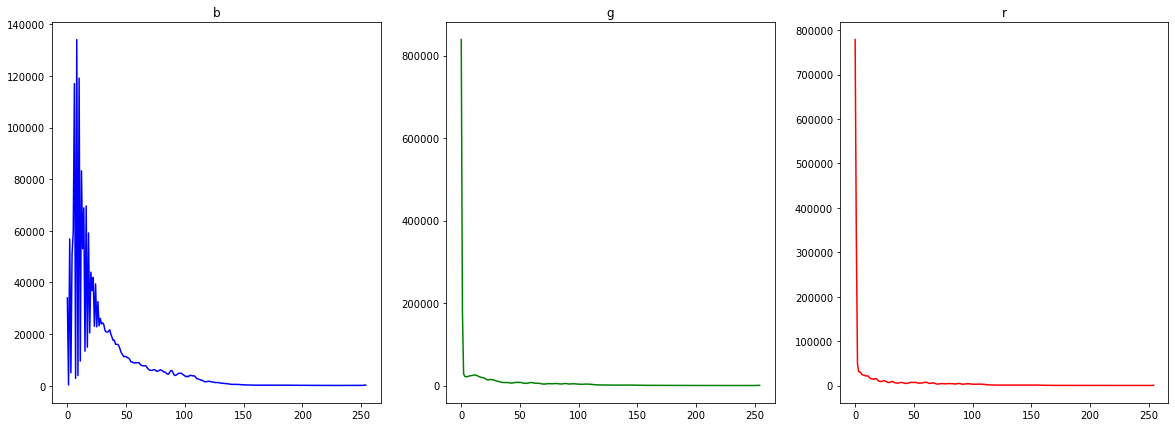

In [3]:
histogram_b = cv2.calcHist([img2], [0], None, [255],(0,255))
histogram_g = cv2.calcHist([img2], [1], None, [255],(0,255))
histogram_r = cv2.calcHist([img2], [2], None, [255],(0,255))

fig = plt.figure(figsize=(20, 7)) 
rows = 1
columns = 3
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
plt.plot(histogram_b, color="b") 
plt.title("b") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
plt.plot(histogram_g, color="g")
plt.title("g") 
  
# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
plt.plot(histogram_r, color="r")
plt.title("r") 

plt.show();

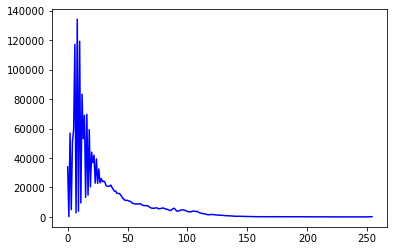

In [6]:
plt.plot(histogram_b, color="b")

In [4]:
def normalizeRed(intensity):
    iI      = intensity
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

def normalizeGreen(intensity):
    iI      = intensity
    minI    = 90
    maxI    = 225
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

def normalizeBlue(intensity):
    iI      = intensity
    minI    = 100
    maxI    = 210
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

In [13]:
# Create an image object

imageObject     = Image.open("/Users/tobiasschulz/Documents/GitHub/mask-detector/face_detector_ssd/dark_img_opti/hell_img.jpg")

# Split the red, green and blue bands from the Image

multiBands      = imageObject.split()

print(multiBands[0])
print(multiBands[1])
print(multiBands[2])

print(normalizeRed(intensity=600.0))

normalizedALL      = imageObject.point(normalizeRed(intensity=500.0), None)


# Apply point operations that does contrast stretching on each color band

normalizedRedBand      = multiBands[0].point(normalizeRed(intensity=500.0), None)

normalizedGreenBand    = multiBands[1].point(normalizeGreen(intensity=60.0))

normalizedBlueBand     = multiBands[2].point(normalizeBlue(intensity=60.0))

 

# Create a new image from the contrast stretched red, green and blue brands

normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

 

# Display the image before contrast stretching

imageObject.show()

 

# Display the image after contrast stretching

normalizedImage.show()

<PIL.Image.Image image mode=L size=1920x1080 at 0x7FB14ABE5400>
<PIL.Image.Image image mode=L size=1920x1080 at 0x7FB132D9BD60>
<PIL.Image.Image image mode=L size=1920x1080 at 0x7FB132D9BF70>
910.2083333333333


TypeError: argument must be a sequence

In [79]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image_c = img

#Generating the histogram of the original image
hist_c,bins_c = np.histogram(image_c.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [84]:
#Converting the image to YCrCb
image_yuv = cv2.cvtColor(image_c, cv2.COLOR_BGR2YUV)


# Loop over the Y channel and apply Min-Max Contrasting
#min = np.min(image_yuv[:,:,0])
#max = np.max(image_yuv[:,:,0])

min = 0
max = 1

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_yuv[:,:,0][i,j] = 255*(image_yuv[:,:,0][i,j]-min)/(max-min)


# convert the YUV image back to RGB format
image_c_cs = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

#Generating the histogram of the image after applying Constrast Stretching
hist_c_cs, bins_c_cs = np.histogram(image_c_cs.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c_cs = hist_c_cs.cumsum()
cdf_c_cs_normalized = cdf_c_cs * hist_c_cs.max()/ cdf_c_cs.max()

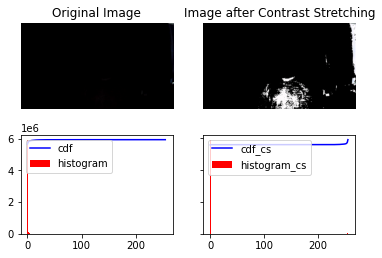

In [85]:

#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_cs, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Image after Contrast Stretching')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(image_c.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_cs_normalized, color = 'b')
axs[1, 1].hist(image_c_cs.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_cs','histogram_cs'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [103]:
image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
image_c = img2


#Generating the histogram of the original image
hist_c,bins_c = np.histogram(image_c.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [108]:
#Converting the image to YCrCb
image_yuv = cv2.cvtColor(image_c, cv2.COLOR_BGR2YUV)

#Creating CLAHE 
clahe = cv2.createCLAHE(clipLimit=20, tileGridSize=(8,8))

# Applying Histogram Equalization on the original imageof the Y channel
image_yuv[:,:,0] = clahe.apply(image_yuv[:,:,0])

# convert the YUV image back to RGB format
image_c_clahe = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

#Generating the histogram of the image after applying CLAHE
hist_c_clahe, bins_c_clahe = np.histogram(image_c_clahe.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c_clahe = hist_c_clahe.cumsum()
cdf_c_clahe_normalized = cdf_c_clahe * hist_c_clahe.max()/ cdf_c_clahe.max()

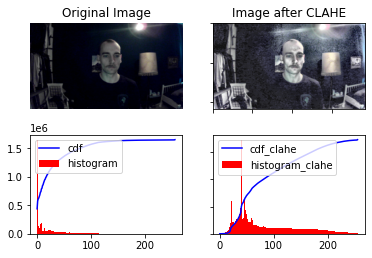

In [109]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_clahe, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('Image after CLAHE')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(image_c.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')


axs[1, 1].plot(cdf_c_clahe_normalized, color = 'b')
axs[1, 1].hist(image_c_clahe.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_clahe','histogram_clahe'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()